In [61]:
import numpy as np
from skimage import io
import skimage.segmentation as segmentation
import skimage.measure as measure
import matplotlib.pyplot as plt
import cv2
import math



<tifffile.TiffFile '20240917_delta6_5.tif'> OME series cannot handle discontiguous storage ((1608, 1608, 3) != (3, 1608, 1608))


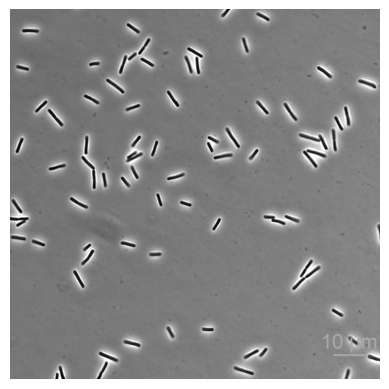

In [94]:
img_path = "../images/20240917_delta6_5.tif"

image = io.imread(img_path, as_gray=True)
image = (image*255).astype(np.uint8)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


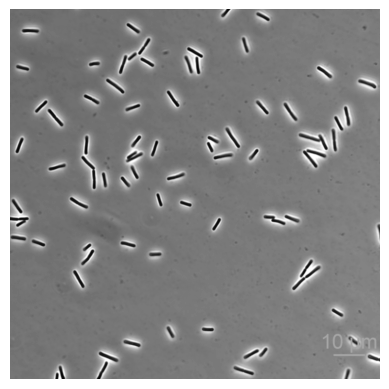

In [95]:
blurred = cv2.GaussianBlur(image, (5,5), 0)

plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

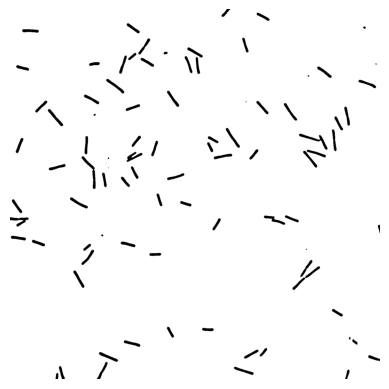

In [96]:
blurred = cv2.GaussianBlur(image, (7,7), 0)
# _, bin_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# bin_image = (bin_image*255).astype(np.uint8)

thres_value = 120
_, bin_image = cv2.threshold(blurred, thres_value, 255, cv2.THRESH_BINARY)

plt.imshow(bin_image, cmap='gray')
plt.axis('off')
plt.show()



In [197]:
def get_contour_stats(contours):
    contour_sizes = np.array([len(contour) for contour in contours])

    avg_size = np.mean(contour_sizes)
    std_size = np.std(contour_sizes)

    return avg_size, std_size

In [274]:
def process_contours(contours):
    # remove redundant dimensions
    contours = [np.squeeze(contour) for contour in contours]

    # determine contour statistics to determine which contours to keep

    avg, std = get_contour_stats(contours)


    print(f"number of contours: {len(contours)}")
    print(f"avg_contour_size: {avg}")
    print(f"contour_size_std: {std}")

    # remove contours that are too small or too large
    contours_keep = [contour for contour in contours if len(contour) >= avg - std and len(contour) < avg + std*3]

    # Recalculate stats for remaining contours 
    avg_keep, std_keep = get_contour_stats(contours_keep)
    contours_keep_2 = [contour for contour in contours_keep if len(contour) >= avg_keep - std_keep and len(contour) < avg_keep + std_keep*3]

    avg_keep, std_keep = get_contour_stats(contours_keep)
    print(f"number of contours after filtering: {len(contours_keep)}")
    print(f"avg_contour_size after filtering: {avg_keep}")
    print(f"contour_size_std after filtering: {std_keep}")

    return contours_keep_2


In [275]:
def get_contour_sizes(contours):
    contour_sizes = {}

    # Iterate through each contour and get its size (number of points in the contour)
    i = 0
    for contour in contours:
        contour_size = contour.shape[0]  # Number of rows (points) in each contour
        contour_sizes[i] = contour_size
        i += 1

    return contour_sizes

In [276]:
bbox_lower_coords = (0, 0)
all_contours_flag = True
closed = True # want contours to be closed

mode = cv2.RETR_CCOMP if all_contours_flag else cv2.RETR_EXTERNAL

contours, hierarchy = cv2.findContours(bin_image, mode, cv2.CHAIN_APPROX_NONE) # chain approx refers to contour approximation (are all points in contour stored or no?)


original_contour_sizes = get_contour_sizes(contours)
print(f"len contours: {len(contours)}")

contours = process_contours(contours)
print(f"len contours: {len(contours)}")

processed_contour_sizes = get_contour_sizes(contours)



len contours: 85
number of contours: 85
avg_contour_size: 207.9764705882353
contour_size_std: 762.4456621174133
number of contours after filtering: 84
avg_contour_size after filtering: 125.05952380952381
contour_size_std after filtering: 62.04997049047228
len contours: 69


In [277]:
print(f"max original contour size: {max(original_contour_sizes.values())}")
print(f"min original contour size: {min(original_contour_sizes.values())}")

print(f"max processed contour sizes: {max(processed_contour_sizes.values())}")
print(f"min processed contour sizes: {min(processed_contour_sizes.values())}")



max original contour size: 7173
min original contour size: 4
max processed contour sizes: 301
min processed contour sizes: 65


In [279]:
for i in original_contour_sizes.values():
    if i not in processed_contour_sizes.values():
        print(f"contour {i} not in processed_contour_sizes")


contour 7173 not in processed_contour_sizes
contour 30 not in processed_contour_sizes
contour 4 not in processed_contour_sizes
contour 4 not in processed_contour_sizes
contour 15 not in processed_contour_sizes
contour 27 not in processed_contour_sizes
contour 11 not in processed_contour_sizes
contour 8 not in processed_contour_sizes
contour 20 not in processed_contour_sizes
contour 323 not in processed_contour_sizes
contour 27 not in processed_contour_sizes
contour 13 not in processed_contour_sizes
contour 21 not in processed_contour_sizes
contour 18 not in processed_contour_sizes
contour 46 not in processed_contour_sizes
contour 31 not in processed_contour_sizes


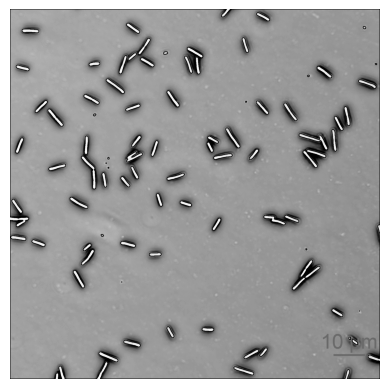

In [280]:
highlight_color = (255, 255, 255)

for contour in contours:
    cv2.drawContours(image, [contour], -1, highlight_color, 2)

plt.imshow(image, cmap='Greys')
plt.axis('off')
plt.show()



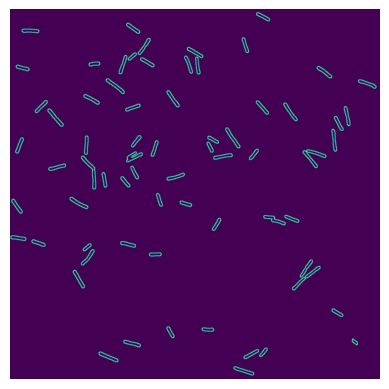

In [281]:
test_image = np.zeros((image.shape), dtype=np.uint8)

for contour in contours:
    cv2.drawContours(test_image, [contour], -1, (255), 2)

plt.imshow(test_image)
plt.axis('off')
plt.show()





In [282]:
'''x_coords = [contour[0][0][0] for contour in contours]
y_coords = [contour[0][0][1] for contour in contours]

print(f"x_coords: {x_coords}")
print(f"y_coords: {y_coords}")'''

print(f"len contours: {len(contours)}")
print(f"shape of first contour: {contours[12].shape}")
print(contours[12])

print(f"x,y: {contours[12][0][0]}, {contours[0][0][1]}")
print(f"x: {contours[12][0][0]}")
print(f"y: {contours[12][0][1]}")


len contours: 69
shape of first contour: (113, 2)
[[ 641 1060]
 [ 642 1059]
 [ 643 1059]
 [ 644 1059]
 [ 645 1059]
 [ 646 1059]
 [ 647 1059]
 [ 648 1059]
 [ 649 1059]
 [ 650 1059]
 [ 651 1059]
 [ 652 1059]
 [ 653 1060]
 [ 654 1060]
 [ 655 1061]
 [ 656 1062]
 [ 657 1063]
 [ 657 1064]
 [ 657 1065]
 [ 657 1066]
 [ 657 1067]
 [ 656 1068]
 [ 655 1069]
 [ 654 1070]
 [ 653 1071]
 [ 652 1071]
 [ 651 1072]
 [ 650 1072]
 [ 649 1072]
 [ 648 1072]
 [ 647 1072]
 [ 646 1072]
 [ 645 1072]
 [ 644 1072]
 [ 643 1072]
 [ 642 1072]
 [ 641 1072]
 [ 640 1072]
 [ 639 1072]
 [ 638 1072]
 [ 637 1072]
 [ 636 1072]
 [ 635 1072]
 [ 634 1072]
 [ 633 1072]
 [ 632 1072]
 [ 631 1072]
 [ 630 1072]
 [ 629 1072]
 [ 628 1072]
 [ 627 1073]
 [ 626 1073]
 [ 625 1073]
 [ 624 1073]
 [ 623 1073]
 [ 622 1073]
 [ 621 1073]
 [ 620 1073]
 [ 619 1073]
 [ 618 1073]
 [ 617 1073]
 [ 616 1073]
 [ 615 1073]
 [ 614 1073]
 [ 613 1073]
 [ 612 1073]
 [ 611 1073]
 [ 610 1072]
 [ 609 1072]
 [ 608 1072]
 [ 607 1071]
 [ 606 1070]
 [ 606 1069]
 

In [283]:
x_coords = [point[0] for contour in contours for point in contour]
y_coords = [point[1] for contour in contours for point in contour]

print(f"x_coords: {len(x_coords)}")
print(f"y_coords: {len(y_coords)}")

x_coords: 9907
y_coords: 9907


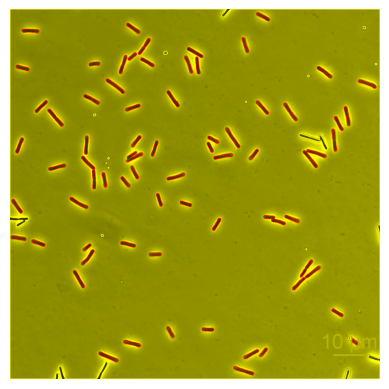

In [284]:
image_2 = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

image_2[:,:,2] = 0

for contour in contours:
    cv2.drawContours(image_2, [contour], -1, (255), 2)

plt.imshow(image_2)
plt.axis('off')
plt.show()


In [227]:
def showImages(images_dict):
    n = len(images_dict)
    cols = math.ceil(np.sqrt(n))
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(5*rows, 5*cols))
    axes = axes.ravel()  # flatten array of axes for easy indexing

    for i, (name, image) in enumerate(images_dict.items()):
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(name)
        axes[i].axis('off')

    for j in range(n, rows*cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig("images.png")

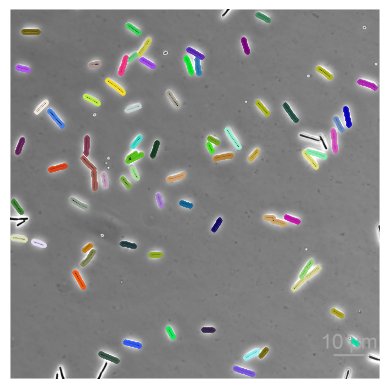

In [293]:
def get_xandy(contour):
    x_coords = [point[0] for point in contour]
    y_coords = [point[1] for point in contour]
    return x_coords, y_coords

'''contour1 = contours[3]
x_coords, y_coords = get_xandy(contour1)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.scatter(x_coords, y_coords, s=1)
plt.show()'''

'''i = 0
for contour in contours:
    x_coords, y_coords = get_xandy(contour)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.scatter(x_coords, y_coords, s=1)
    # plt.savefig(f"contour_{i}.png")
    plt.show()
    plt.close()
    i += 1'''


# colors = plt.cm.hsv(np.linspace(0, 1, len(contours)))
colors = np.random.rand(len(contours), 3)

plt.imshow(image, cmap='gray')
for i, contour in enumerate(contours):
    x_coords, y_coords = get_xandy(contour)
    plt.scatter(x_coords, y_coords, s=.05, color=colors[i])

plt.axis('off')
plt.show()




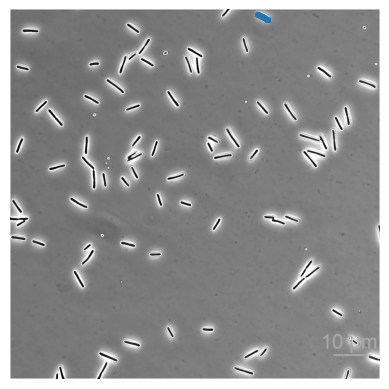

In [229]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.scatter(x_coords, y_coords, s=1)

plt.show()
